In [13]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data = pd.read_csv( './datasets/kc_house_data.csv')

In [5]:
# 1. Crie uma coluna nova chamada "dormitory_type"
data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'

<BarContainer object of 13 artists>

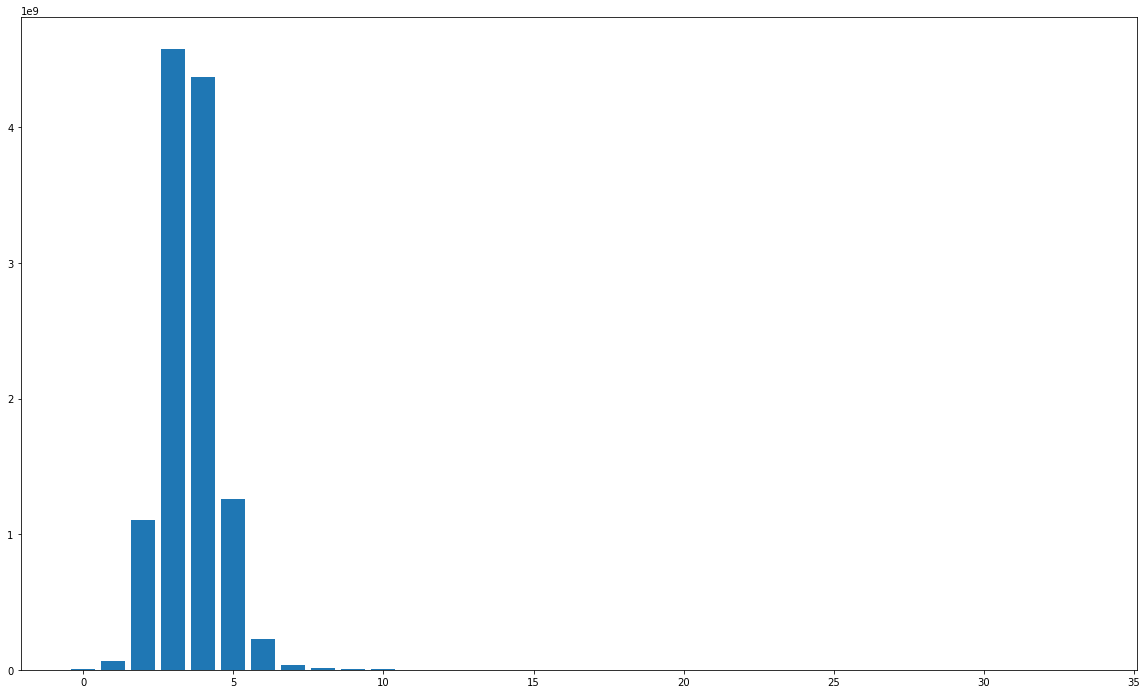

In [38]:
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
from matplotlib import pyplot as plt

by_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure(figsize=(20, 12))
plt.bar( by_bedrooms['bedrooms'], by_bedrooms['price'] )

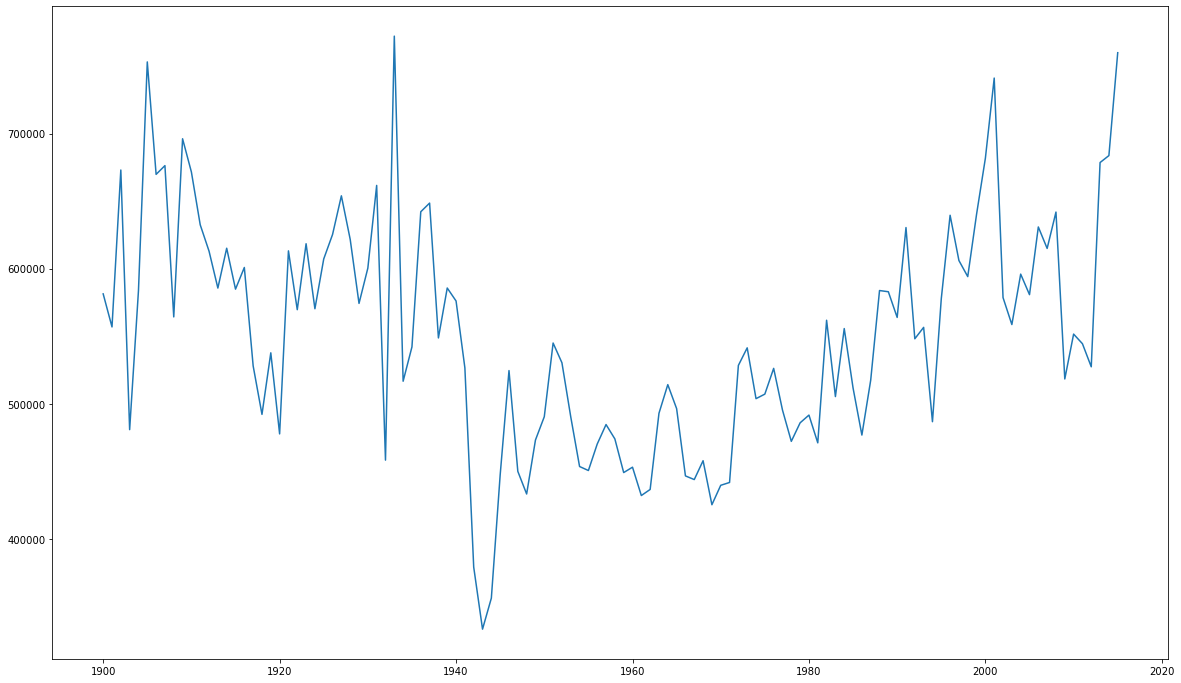

In [39]:
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.
by_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.figure(figsize=(20, 12))
plt.plot( by_year['yr_built'], by_year['price'] )

<BarContainer object of 3 artists>

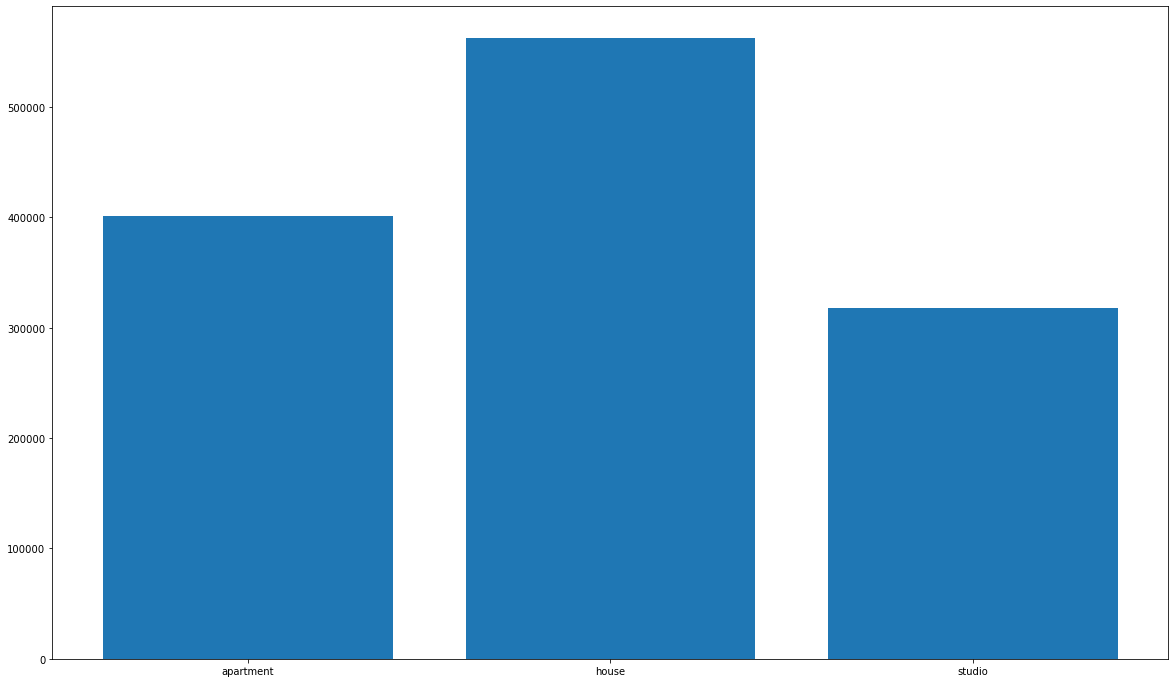

In [40]:
# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
by_dormitory_type = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
plt.figure( figsize=(20,12) )
plt.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )

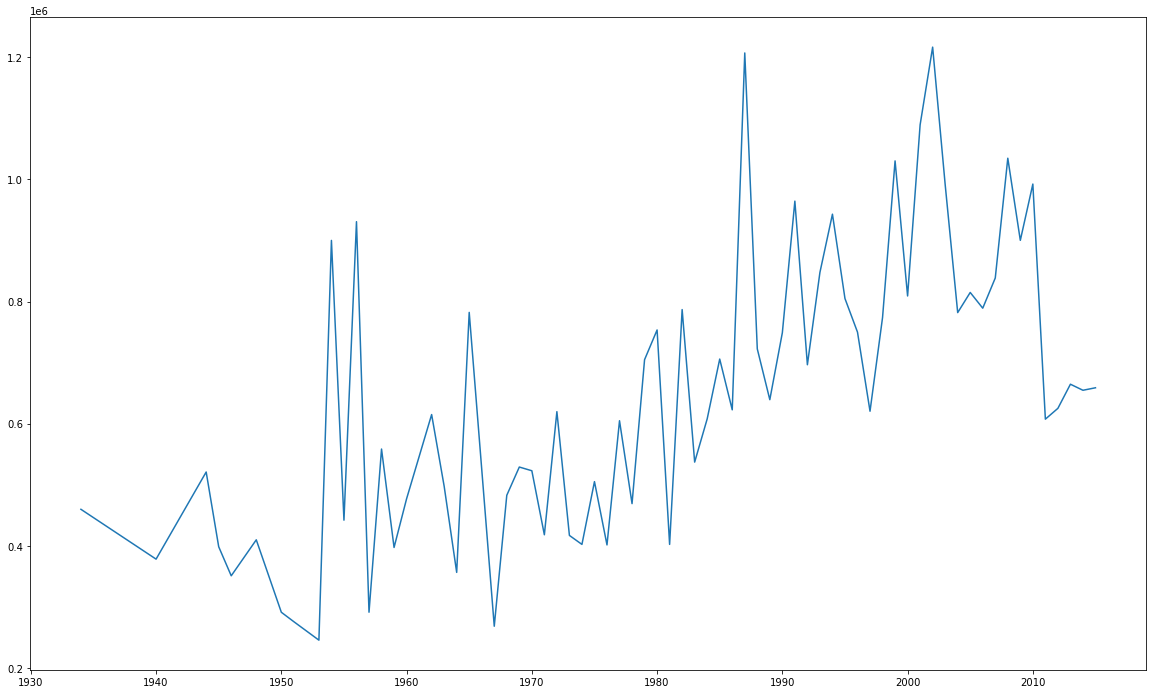

In [44]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, 
# a partir do ano de 1930.

by_yr_renovated = data[['price', 'yr_renovated']][data['yr_renovated'] > 1930].groupby('yr_renovated').mean().reset_index()
plt.figure( figsize=(20, 12) )
plt.plot( by_yr_renovated['yr_renovated'], by_yr_renovated['price'] )


In [48]:
# 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

by_year_and_dormitory_type = data[['price', 'yr_built', 'dormitory_type']].groupby( ['yr_built', 'dormitory_type'] ).mean().reset_index()
by_year_and_dormitory_type

,yr_built,dormitory_type,price
0,1900,apartment,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartment,452856.40
4,1901,house,578619.17
...,...,...,...
300,2014,house,692687.72
301,2014,studio,516500.00
302,2015,apartment,543250.00
303,2015,house,797383.06


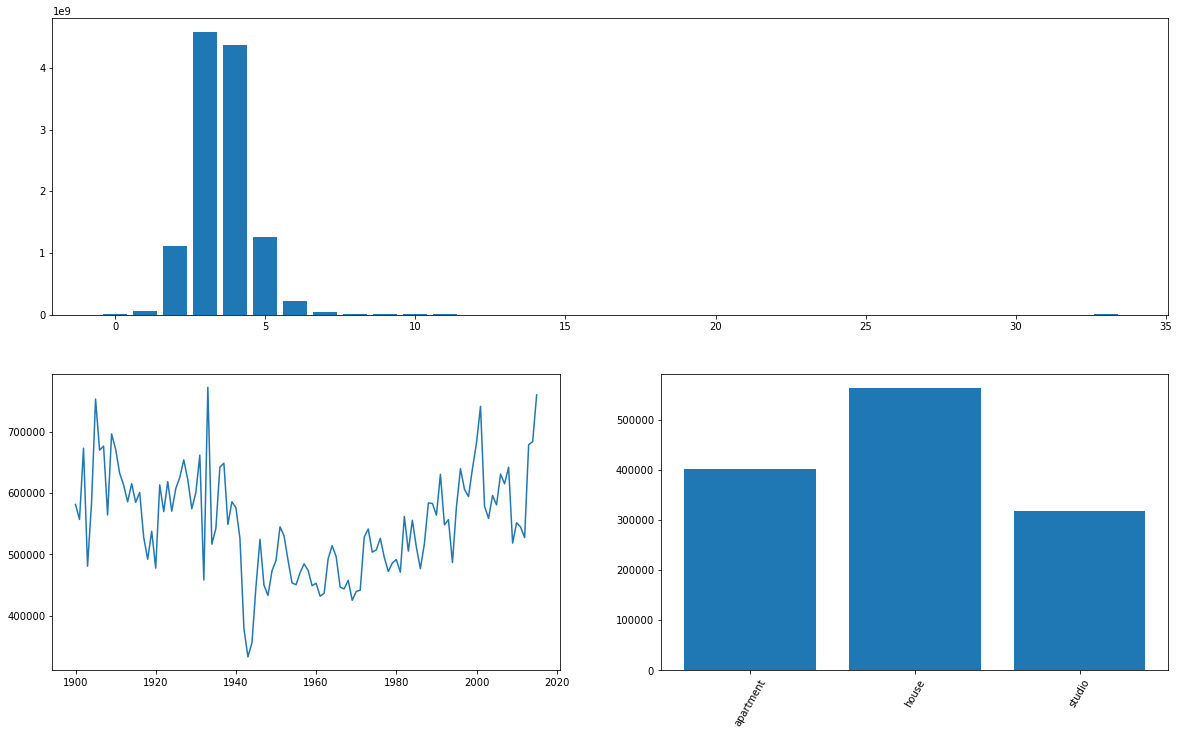

In [50]:
# 7. Crie um dashboard com os gráficos das questões 02, 03 e 04 ( Dashboard: 1 linha e 2 colunas )

from matplotlib import gridspec

fig = plt.figure( figsize=(20, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot(specs[0, :]) # First Row
ax2 = fig.add_subplot(specs[1, 0]) # Second Row - First Column
ax3 = fig.add_subplot(specs[1, 1]) # Second Row - Second Column

ax1.bar( by_bedrooms['bedrooms'], by_bedrooms['price'] )
ax2.plot( by_year['yr_built'], by_year['price'] )
ax3.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )

plt.xticks( rotation=60 );

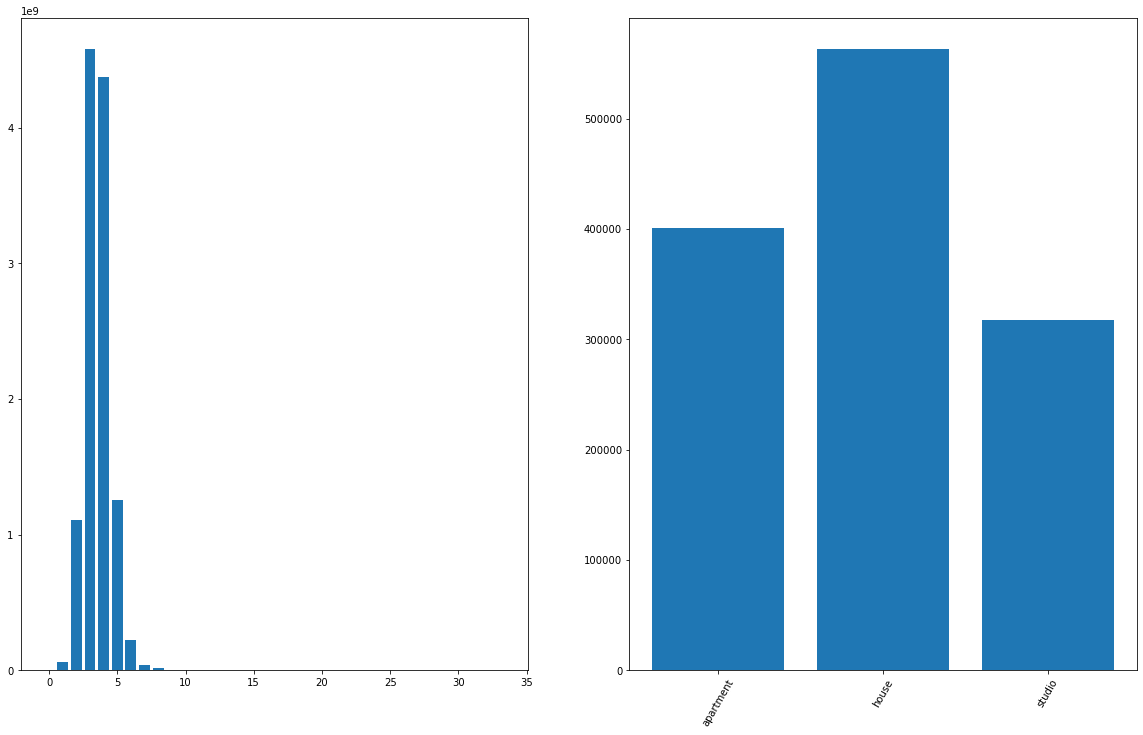

In [54]:
# 8. Crie um dashboard com os gráficos das questões 02 e 04 ( Dashboard: 2 colunas )

fig = plt.figure( figsize=(20, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig )

ax1 = fig.add_subplot(specs[0, 0]) # First Row - First Column
ax2 = fig.add_subplot(specs[0, 1]) # First Row - Second Column

ax1.bar( by_bedrooms['bedrooms'], by_bedrooms['price'] )
ax2.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )

plt.xticks( rotation=60 );

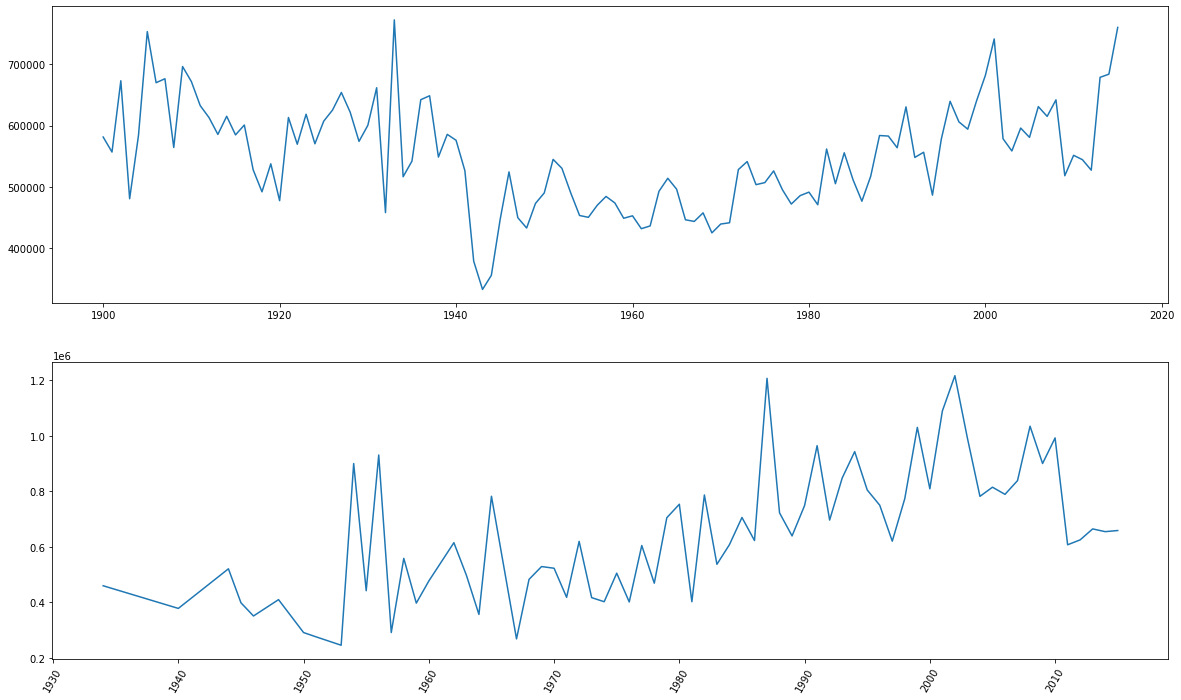

In [55]:
# 9. Crie um dashboard com os gráficos das questões 03 e 05 ( Dashboard: 2 linhas )

fig = plt.figure( figsize=(20, 12) )
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig )

ax1 = fig.add_subplot(specs[0, 0]) # First Row - First Column
ax2 = fig.add_subplot(specs[1, 0]) # Second Row - First Column

ax1.plot( by_year['yr_built'], by_year['price'] )
ax2.plot( by_yr_renovated['yr_renovated'], by_yr_renovated['price'] )

plt.xticks( rotation=60 );

In [59]:
# 10. Faça um mapa com o tamanho dos pontos sendo igual ao tamanho da sala de estar

import plotly.express as px

houses = data[['id', 'lat', 'long', 'sqft_living']]

fig = px.scatter_mapbox( houses, 
                         lat = 'lat',
                         lon = 'long',
                         size = 'sqft_living',
                         color_continuous_scale=px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=300)

fig.update_layout( mapbox_style='open_street_map' )
fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()